<a href="https://colab.research.google.com/github/PiyumaliSandunika/e18-4yp-Multimodal-Emotion-Prediction-Using-Reinforcement-Learning/blob/main/Text_model/online_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


** Model Loading**

In [2]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch

# Load the saved model
model_path = "/content/drive/MyDrive/FYP_Text/"
loaded_model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
def predict_emotion_with_probabilities(sentence, model, tokenizer):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors="pt")

    # Perform inference
    outputs = model(**inputs)
    logits = outputs.logits

    # Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=1)

    # Convert probabilities tensor to list
    probabilities_list = probabilities.squeeze().tolist()

    # Map predicted label to emotion
    emotion_labels = ["happiness", "sadness", "anger", "neutral"]
    predicted_emotion = emotion_labels[torch.argmax(logits, dim=1).item()]

    return probabilities_list, predicted_emotion


In [14]:

# Example sentences for prediction
sentences = [
    # "I am a broken-hearted",
    # "I am emotionaly damaged right now",
    # "Do what makes feel you better",
    # "I feel nervous",
    # "I am a student",
    # "You're stupid and it makes me anger",
    # "Go to hell",
    # "You are the worst,I do not want to see you",
    # "I am angry right now",
    # "You are my sunshine",
    # "Such a wonderful performance",
    # "I am lonely",
    # "This is strange! anyways bravo to myself!",
    # "Things are getting stranger",
    # "I lumped my throat",
    # "Billy, your face is like a wet weekend",
    "what a crap"
]

# Perform prediction for each sentence
for sentence in sentences:
    predicted_emotion = predict_emotion_with_probabilities(sentence,loaded_model,tokenizer)
    print(f"Sentence: '{sentence}'")
    print(f"Predicted Emotion: {predicted_emotion}\n")

Sentence: 'what a crap'
Predicted Emotion: ([0.0005974516971036792, 0.0073122610338032246, 0.9917029738426208, 0.00038723749457858503], 'anger')



In [ ]:
# def active_learning_selection(user_data, model, threshold=0.5):
#     selected_examples = []
#     for text, label in user_data:
#         encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
#         outputs = model(**encoded_input)
#         probabilities = torch.softmax(outputs.logits, dim=1)
#         confidence = probabilities.max().item()
#         if confidence < threshold:
#             selected_examples.append((text, label))
#     return selected_examples

# # Function for online learning update
# def online_learning_update(new_data, model, optimizer, loss_fn):
#     for text, label in new_data:
#         encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
#         outputs = model(**encoded_input, labels=torch.tensor([label]))
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#     return model
# def is_confident(predicted_label, confidence_threshold=0.7):
#     # Check if the prediction confidence is above the threshold
#     return confidence_threshold <= torch.softmax(predicted_label, dim=1).max()

In [ ]:
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
# import torch

# # Initialize DistilBERT tokenizer and load the fine-tuned model
# model_path = "/content/drive/MyDrive/FYP_Text/"
# loaded_model = DistilBertForSequenceClassification.from_pretrained(model_path)
# tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# # Define label mappings
# label_map = {
#     0: "happiness",
#     1: "sadness",
#     2: "anger",
#     3: "neutral"
# }

# # Function for online learning update
# def online_learning_update(new_data, model, optimizer, loss_fn):
#     for text, label in new_data:
#         encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
#         encoded_input['labels'] = torch.tensor([label])
#         outputs = model(**encoded_input)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()
#     return model

# # Main loop for user interaction
# user_data = []

# optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)  # Optimizer for online learning
# loss_fn = torch.nn.CrossEntropyLoss()  # Loss function for online learning

# while True:
#     # Receive input from the user
#     user_input = input("Enter text: ")

#     # Perform inference with the current model
#     encoded_input = tokenizer(user_input, padding=True, truncation=True, return_tensors='pt')
#     outputs = model(**encoded_input)
#     predicted_label = torch.argmax(outputs.logits, dim=1).item()
#     print(f"Predicted emotion: {label_map[predicted_label]}")

#     # Ask for user feedback
#     user_label = int(input("Enter correct label (happiness:0, sadness:1, anger:2, neutral:3): "))
#     user_data.append((user_input, user_label))

#     # Retrain the model with the new data
#     model = online_learning_update([(user_input, user_label)], model, optimizer, loss_fn)

#     # Perform inference with the updated model
#     outputs = model(**encoded_input)
#     predicted_label = torch.argmax(outputs.logits, dim=1).item()
#     print(f"New predicted emotion: {label_map[predicted_label]}")

#     # Prompt the user for more input
#     more_data = input("Do you have more data to provide? (yes/no): ")
#     if more_data.lower() != "yes":
#         break


Enter text: I’m on cloud nine
Predicted emotion: neutral
Enter correct label (happiness:0, sadness:1, anger:2, neutral:3): 0
New predicted emotion: happiness
Do you have more data to provide? (yes/no): no


In [ ]:
# # Perform inference with the updated model
# encoded_input = tokenizer("I'm on cloud", padding=True, truncation=True, return_tensors='pt')
# outputs = model(**encoded_input)
# predicted_label = torch.argmax(outputs.logits, dim=1).item()
# print(f"New predicted emotion: {label_map[predicted_label]}")


Evaluation with Holdout data

In [5]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
import pandas as pd

# Initialize DistilBERT tokenizer and load the fine-tuned model
model_path = "/content/drive/MyDrive/FYP_Text/"
loaded_model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Define label mappings
label_map = {
    0: "happiness",
    1: "sadness",
    2: "anger",
    3: "neutral"
}

# Function for online learning update
def online_learning_update(new_data, model, optimizer, loss_fn):
    for text, label in new_data:
        encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
        encoded_input['labels'] = torch.tensor([label])
        outputs = model(**encoded_input)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return model

# Function to evaluate model
def evaluate_model(model, tokenizer, holdout_data):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for text, label in holdout_data:
            encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
            labels = torch.tensor([label])
            outputs = model(**encoded_input, labels=labels)
            logits = outputs.logits
            _, predicted = torch.max(logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Main loop for user interaction
user_data = []

optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=5e-5)  # Optimizer for online learning
loss_fn = torch.nn.CrossEntropyLoss()  # Loss function for online learning

# Holdout data for evaluation
# holdout_data = [
#     ("text1", 0),  # Example data with label
#     ("text2", 1),
#     # Add more holdout data as needed
# ]



In [6]:
# Load holdout data from CSV
holdout_data_file = "testdata.csv"
holdout_df = pd.read_csv(holdout_data_file)
# Shuffle the DataFrame
holdout_df = holdout_df.sample(frac=1).reset_index(drop=True)
# Extract sentences and labels
texts = holdout_df['content'].tolist()
holdout_df["emotion"] = holdout_df["emotion"].str.strip()
labels = holdout_df['emotion'].tolist()
# Convert emotion labels to numerical values
label_map2 = {"happiness": 0, "sadness": 1, "anger": 2, "neutral": 3}
labels = [label_map2[label] for label in labels]
# Convert holdout data to list of tuples
holdout_data = list(zip(texts,labels))

In [7]:
# Load train data from CSV
train_data_file = "traindata.csv"
train_df = pd.read_csv(holdout_data_file)
# Shuffle the DataFrame
train_df = train_df.sample(frac=1).reset_index(drop=True)
# Extract sentences and labels
texts = train_df['content'].tolist()
train_df["emotion"] = train_df["emotion"].str.strip()
labels = train_df['emotion'].tolist()
# Convert emotion labels to numerical values
label_map2 = {"happiness": 0, "sadness": 1, "anger": 2, "neutral": 3}
labels = [label_map2[label] for label in labels]
# Convert holdout data to list of tuples
train_data = list(zip(texts,labels))

In [ ]:

# # Initial evaluation
# initial_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
# print("Initial accuracy:", initial_accuracy)

# while True:
#     # Receive input from the user
#     user_input = input("Enter text: ")

#     # Perform inference with the current model
#     encoded_input = tokenizer(user_input, padding=True, truncation=True, return_tensors='pt')
#     outputs = loaded_model(**encoded_input)
#     predicted_label = torch.argmax(outputs.logits, dim=1).item()
#     print(f"Predicted emotion: {label_map[predicted_label]}")

#     # Ask for user feedback
#     user_label = int(input("Enter correct label (happiness:0, sadness:1, anger:2, neutral:3): "))
#     user_data.append((user_input, user_label))

#     # Retrain the model with the new data
#     loaded_model = online_learning_update([(user_input, user_label)], loaded_model, optimizer, loss_fn)

#     # Perform inference with the updated model
#     outputs = loaded_model(**encoded_input)
#     predicted_label = torch.argmax(outputs.logits, dim=1).item()
#     print(f"New predicted emotion: {label_map[predicted_label]}")

#     # Prompt the user for more input
#     more_data = input("Do you have more data to provide? (yes/no): ")
#     if more_data.lower() != "yes":
#         break

# # Evaluate model after update
# updated_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
# print("Updated accuracy:", updated_accuracy)


Initial accuracy: 0.6632124352331606
Enter text: Missed an important deadline
Predicted emotion: sadness
Enter correct label (happiness:0, sadness:1, anger:2, neutral:3): 1
New predicted emotion: sadness
Do you have more data to provide? (yes/no): yes
Enter text: Are you kidding me right now
Predicted emotion: sadness
Enter correct label (happiness:0, sadness:1, anger:2, neutral:3): 2
New predicted emotion: neutral
Do you have more data to provide? (yes/no): Are you kidding me right now
Updated accuracy: 0.6632124352331606


In [10]:

# Initial evaluation
initial_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
print("Initial accuracy:", initial_accuracy)

counter = 0
total_inputs = 0
accuracy_values = [initial_accuracy]  # List to store accuracy values
# while True:


for user_input, user_label in train_data:
    # Perform inference with the current model
    encoded_input = tokenizer(user_input, padding=True, truncation=True, return_tensors='pt')
    outputs = loaded_model(**encoded_input)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    print(f"Predicted emotion: {label_map[predicted_label]}")

    # Retrain the model with the new data
    loaded_model = online_learning_update([(user_input, user_label)], loaded_model, optimizer, loss_fn)

    # Perform inference with the updated model
    outputs = loaded_model(**encoded_input)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    print(f"New predicted emotion: {label_map[predicted_label]}")

    total_inputs += 1

    if total_inputs % 5 == 0:
        # Evaluate model after every 5 inputs
        updated_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
        accuracy_values.append(updated_accuracy)
        print("Updated accuracy:", updated_accuracy)

    # Prompt the user for more input
    # more_data = input("Do you have more data to provide? (yes/no): ")
    # if more_data.lower() != "yes":
    #     break


Initial accuracy: 0.635
Predicted emotion: neutral
New predicted emotion: neutral
Predicted emotion: happiness
New predicted emotion: happiness
Predicted emotion: sadness
New predicted emotion: sadness
Predicted emotion: neutral
New predicted emotion: neutral
Predicted emotion: happiness
New predicted emotion: happiness
Updated accuracy: 0.64
Predicted emotion: neutral
New predicted emotion: anger
Predicted emotion: sadness
New predicted emotion: neutral
Predicted emotion: anger
New predicted emotion: neutral
Predicted emotion: neutral
New predicted emotion: happiness
Predicted emotion: neutral
New predicted emotion: neutral
Updated accuracy: 0.745
Predicted emotion: neutral
New predicted emotion: anger
Predicted emotion: sadness
New predicted emotion: sadness
Predicted emotion: happiness
New predicted emotion: happiness
Predicted emotion: anger
New predicted emotion: sadness
Predicted emotion: neutral
New predicted emotion: neutral
Updated accuracy: 0.735
Predicted emotion: neutral
Ne

In [ ]:
# Plotting the graph
inputs = range(0, total_inputs + 1, 5)
plt.plot(inputs, accuracy_values, marker='o')
plt.xlabel('Number of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Inputs')
plt.grid(True)
plt.show()

Initial accuracy: 0.635
Updated accuracy: 0.6
Updated accuracy: 0.62
Updated accuracy: 0.62
Updated accuracy: 0.625
Updated accuracy: 0.625
Updated accuracy: 0.61
Updated accuracy: 0.59
Updated accuracy: 0.575
Updated accuracy: 0.585
Updated accuracy: 0.535
Updated accuracy: 0.53
Updated accuracy: 0.565
Updated accuracy: 0.575
Updated accuracy: 0.645
Updated accuracy: 0.72
Updated accuracy: 0.73
Updated accuracy: 0.73
Updated accuracy: 0.73
Updated accuracy: 0.79
Updated accuracy: 0.85
Updated accuracy: 0.895
Updated accuracy: 0.915
Updated accuracy: 0.905
Updated accuracy: 0.895
Updated accuracy: 0.915
Updated accuracy: 0.905
Updated accuracy: 0.915
Updated accuracy: 0.925
Updated accuracy: 0.935
Updated accuracy: 0.965
Updated accuracy: 0.97
Updated accuracy: 0.955
Updated accuracy: 0.95
Updated accuracy: 0.98
Updated accuracy: 0.975
Updated accuracy: 0.975
Updated accuracy: 0.98
Updated accuracy: 0.98
Updated accuracy: 0.98
Updated accuracy: 0.98


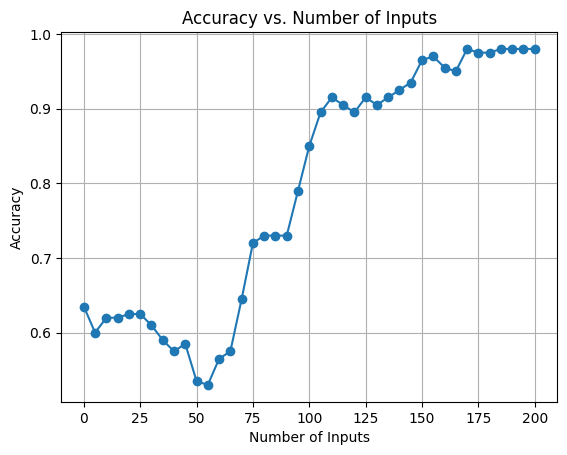

In [8]:
import matplotlib.pyplot as plt

initial_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
print("Initial accuracy:", initial_accuracy)

counter = 0
total_inputs = 0
accuracy_values = [initial_accuracy]  # List to store accuracy values

for user_input, user_label in train_data:
    encoded_input = tokenizer(user_input, padding=True, truncation=True, return_tensors='pt')
    outputs = loaded_model(**encoded_input)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    # print(f"Predicted emotion: {label_map[predicted_label]}")

    loaded_model = online_learning_update([(user_input, user_label)], loaded_model, optimizer, loss_fn)

    outputs = loaded_model(**encoded_input)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    # print(f"New predicted emotion: {label_map[predicted_label]}")

    total_inputs += 1

    if total_inputs % 5 == 0:
        updated_accuracy = evaluate_model(loaded_model, tokenizer, holdout_data)
        accuracy_values.append(updated_accuracy)  # Append updated accuracy
        print("Updated accuracy:", updated_accuracy)

    if total_inputs >= 250:  # Stop after a certain number of inputs (adjust as needed)
        break

# Plotting the graph
inputs = range(0, total_inputs + 1, 5)
plt.plot(inputs, accuracy_values, marker='o')
plt.xlabel('Number of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Inputs')
plt.grid(True)
plt.show()
